# Visualizing Energy Data
----
 The plots here are made using data downloaded from the ENTSO-E API. 


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator

def getCountryList():
    test1 = ["DE","FR","NO"]
    list1 = ["DE","FR", "BE","BG","HR","CZ","EE","FI","GR","HU","IT","LV","LT","LU","ME","NL","NO","PL","PT","SK","CH"]
    actualMissing = ["DK","XK","MK","RO","SI","ES","SE"]
    forecastFound = ["BE","CH","CZ","DE","FI","HU","LT","NL","PL"]
    return forecastFound

def countryName(ky):
    countries = {'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'GR': 'Greece', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 'Luxembourg', 'LV': 'Latvia', 'MT': 'Malta', 'NL': 'Netherlands', 'PL': 'Poland', 'PT': 'Portugal',  'RO': 'Romania',   'SE': 'Sweden','SI': 'Slovenia', 'SK': 'Slovakia', 'CH': 'Switzerland',"ME":"Montenegro","MK":"North Macedonia","NO":"Norway"}
    return countries[ky]

def getCountryData(code,dataType,startDate,endDate):
    csv_file = './rawData/'+code+'-202001010000-202301010000-'+dataType+'-60.csv'
    start_date = pd.to_datetime(startDate)
    end_date = pd.to_datetime(endDate)
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    return filtered_data

# Method to filter hourly data based on start and end dates
def filter_data_by_date(csv_file, start_date, end_date):
    # Load CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # Convert 'startTime' column to datetime format
    df['startTime'] = pd.to_datetime(df['startTime'], format='%Y%m%d%H%M')
    # Filter data based on start and end dates
    filtered_data = df[(df['startTime'] >= start_date) & (df['startTime'] <= end_date)]
    return filtered_data

# Method to create a line chart from hourly data
def create_line_chart(hourly_data,title,column="percentRenewable"):
    plt.figure(figsize=(15, 5))
    if column in hourly_data.columns:
        data = hourly_data[column]
    else:
        data  =  [0] * len(hourly_data)
    plt.plot(hourly_data['startTime'], data, color='#04316a')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(title)
    # Format x-axis tick labels to show hours
    # hours_locator = HourLocator(interval=1)
    # hours_formatter = DateFormatter('%H:%M')
    # plt.gca().xaxis.set_major_locator(hours_locator)
    # plt.gca().xaxis.set_major_formatter(hours_formatter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_multiple_line_charts(dataframe, title, column_list):
    """
    Plot multiple line charts based on the specified columns in the given DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_list (list): List of column names to plot as line charts.
    """
    plt.figure(figsize=(15, 6))
    for column in column_list:
        if column in dataframe.columns:
            plt.plot(dataframe['startTime'], dataframe[column], label=column)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

## Actual generation hourly plots
----

The plots below are based on the actual generation data for multiple countries. Plot types include: 
- Percentage of energy generated using renewable sources
- Total generation of energy from renewable and non renewable sources

The plots below show what percentage of electricity is produced from renewable sources across mulitple countries for the given time period. The percentages are calculated based on actual generation data. 


The time duration can be adjusted in the cell below :

In [27]:
hourly_start_date="2022-05-01"
hourly_end_date="2022-05-05"

In [140]:
def showPercentageRenewable(data,code,start,end):
    create_line_chart(data,'Hourly Percentage of Renewable Energy in '+countryName(code)+' from '+start+' to '+end)

def showEnergyTypePlot(data,code,start,end):
    print()
    plot_multiple_line_charts(data,"Total generation Renewable vs Non renewable sources in "+countryName(code)+' from '+start+' to '+end,["renewableTotal","nonRenewableTotal","total"])
    
def showHourlyPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getCountryData(c,"actual",start,end)
        print(countryName(c))
        showPercentageRenewable(data,c,start,end)
        showEnergyTypePlot(data,c,start,end)

Belgium


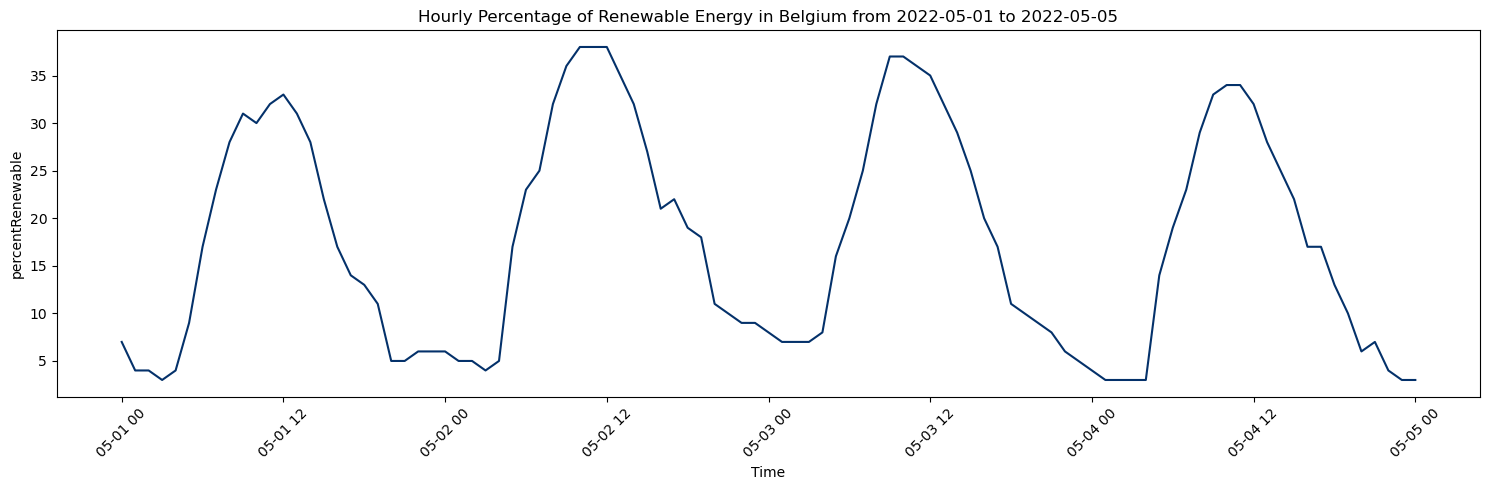

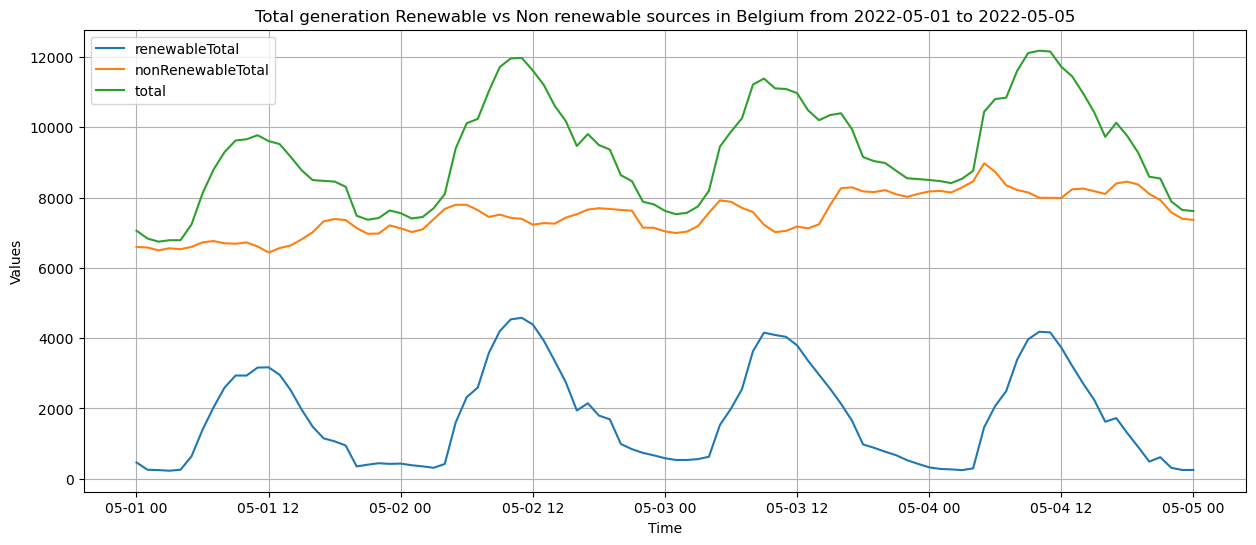

Switzerland


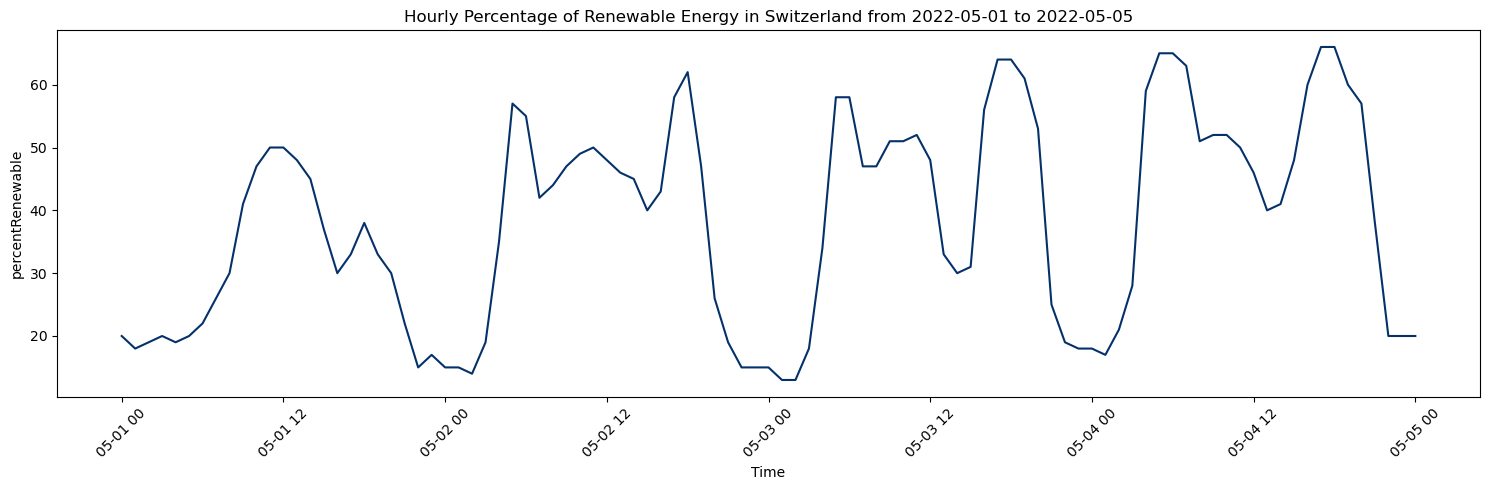

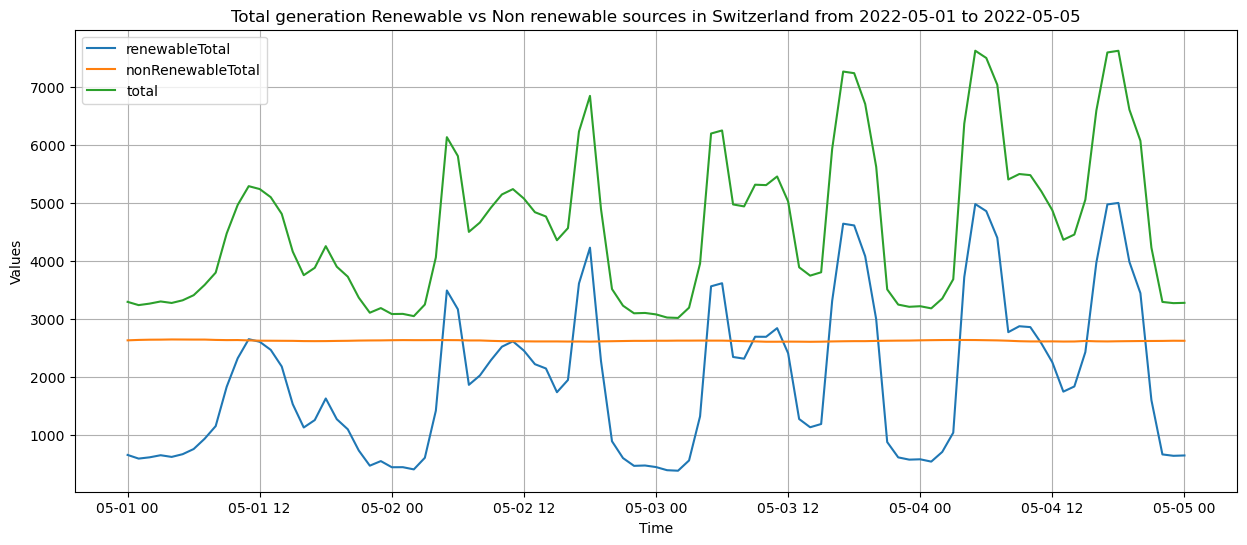

Czech Republic


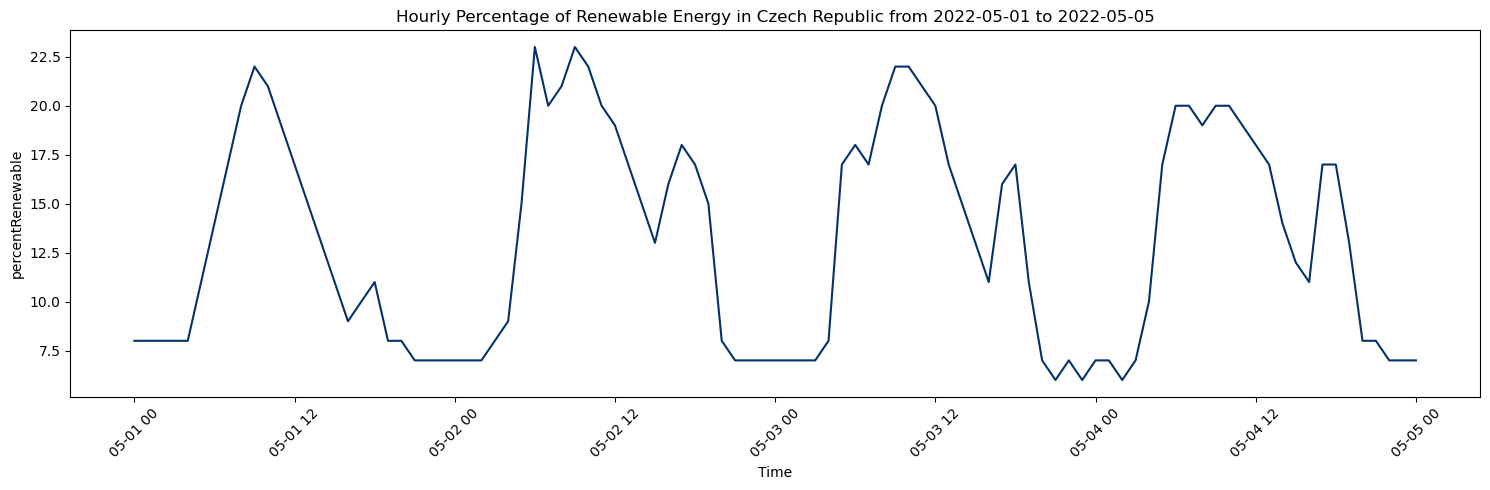

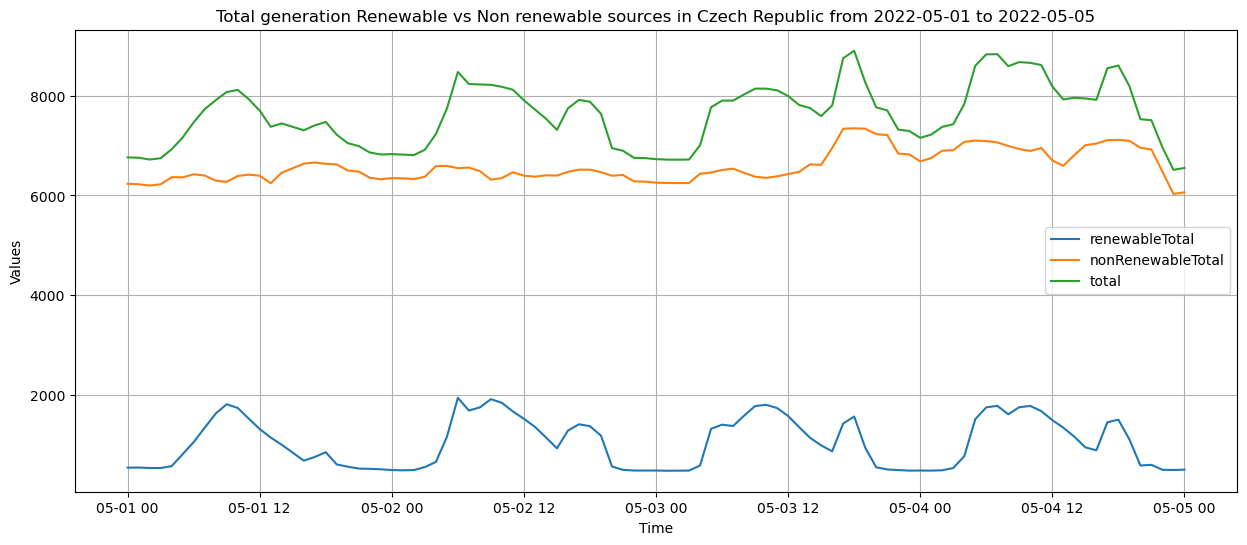

Germany


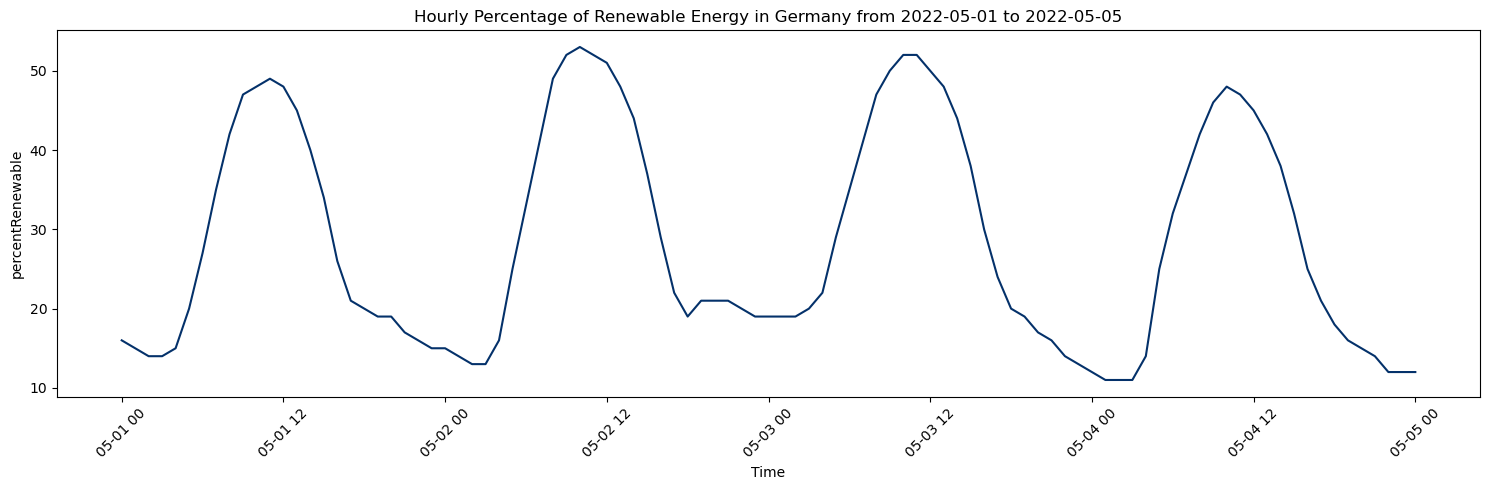

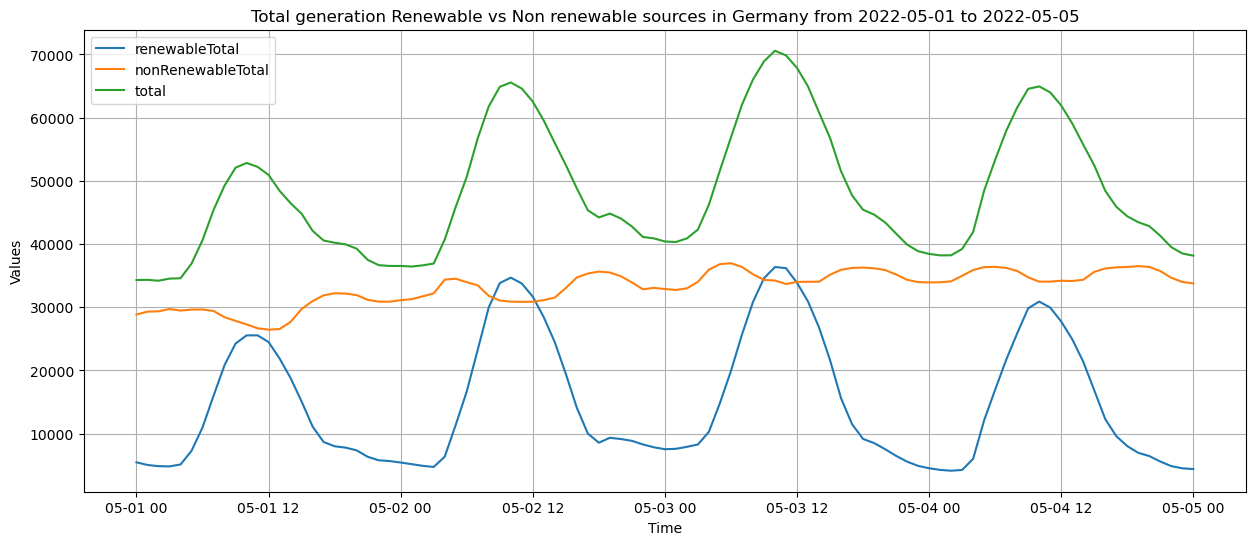

Finland


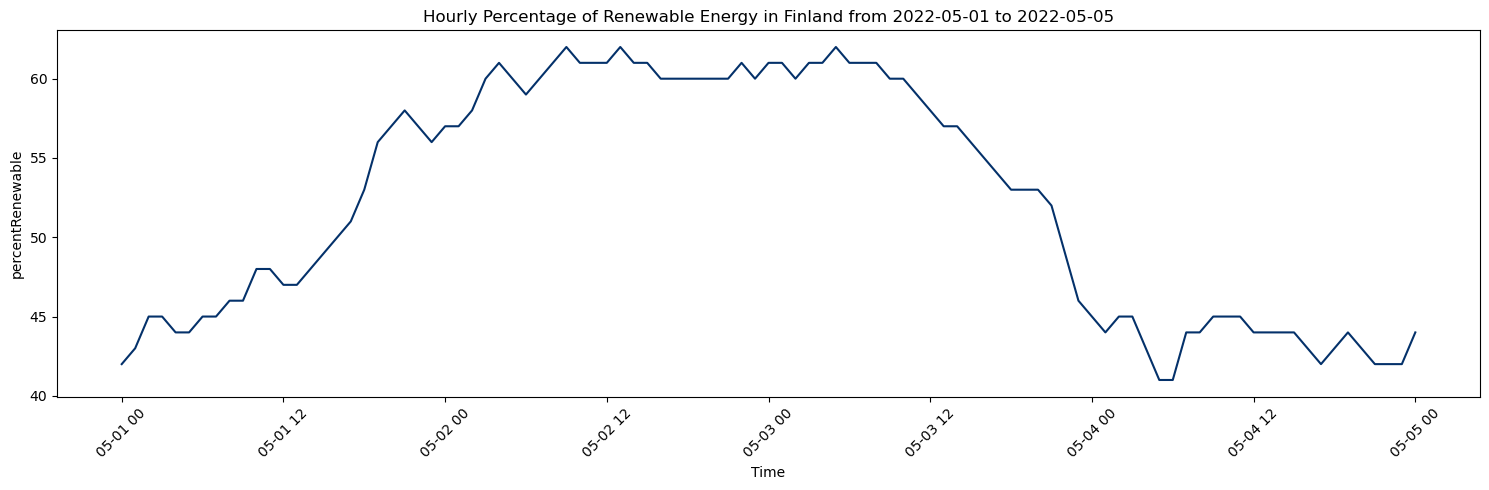

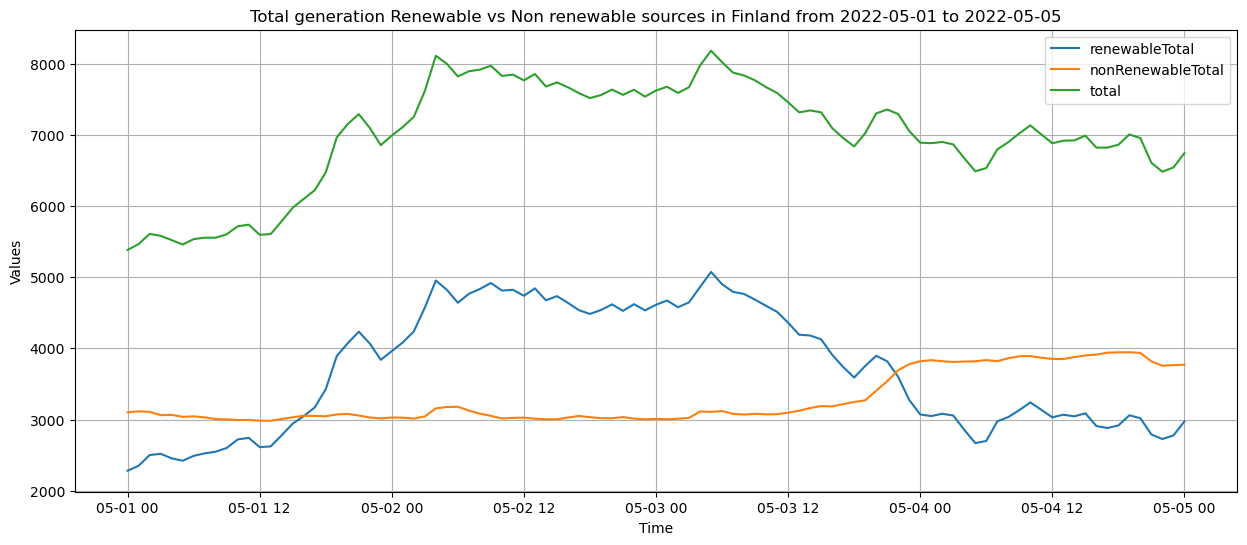

Hungary


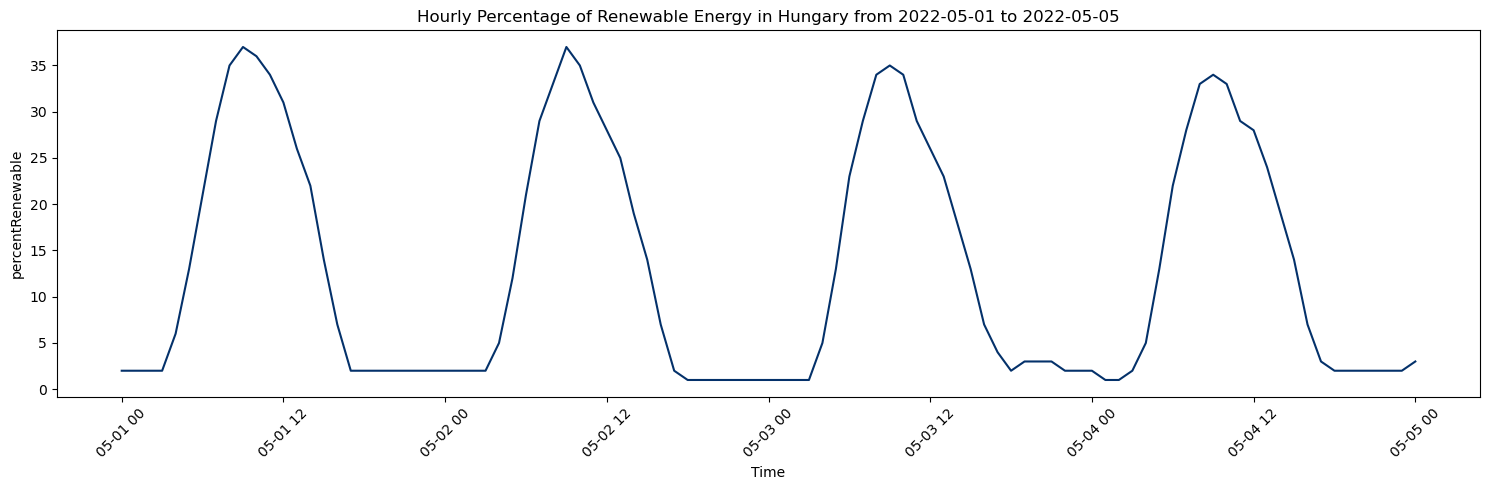

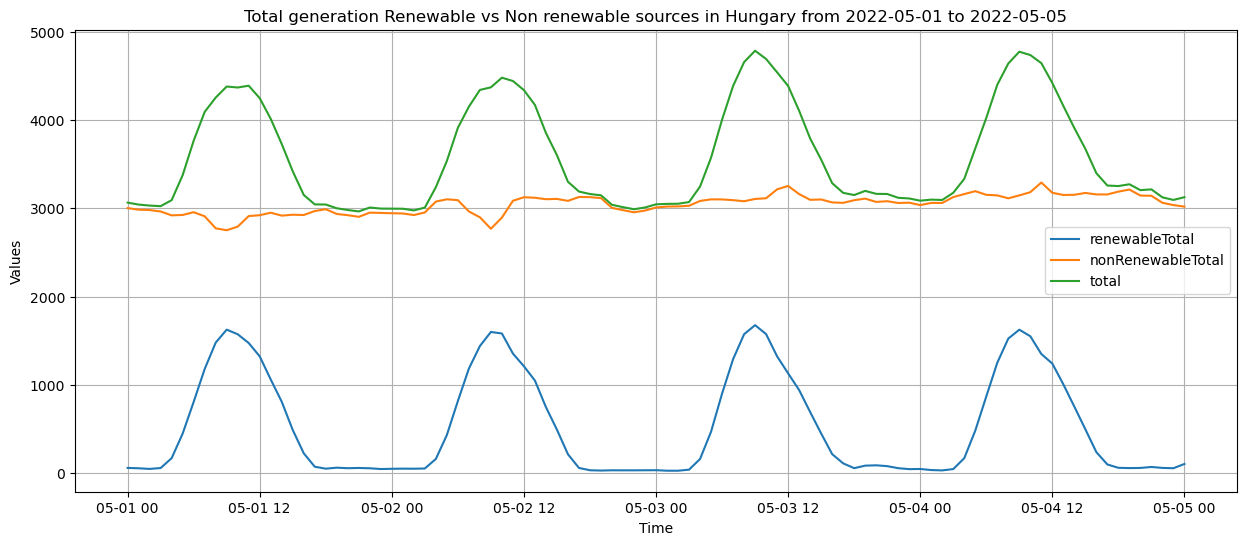

Lithuania


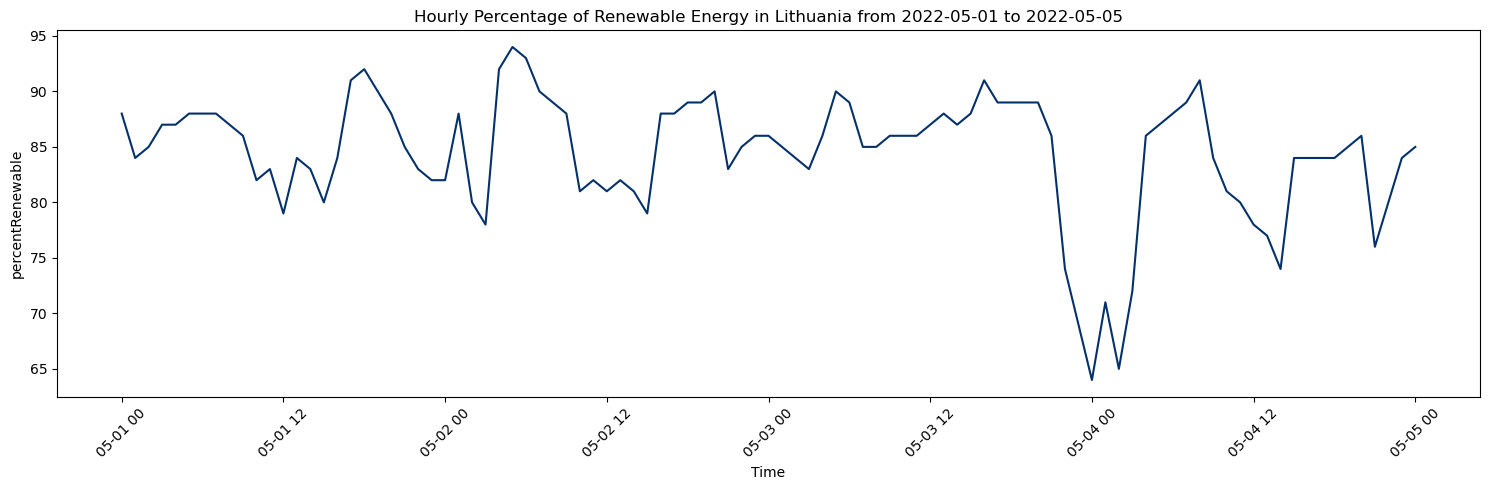

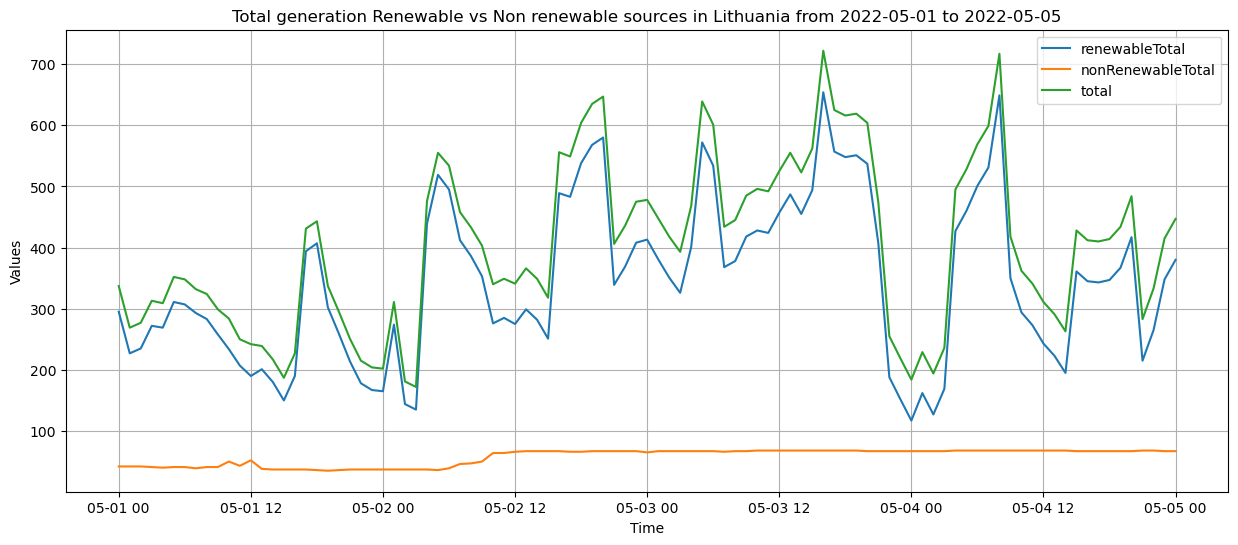

Netherlands


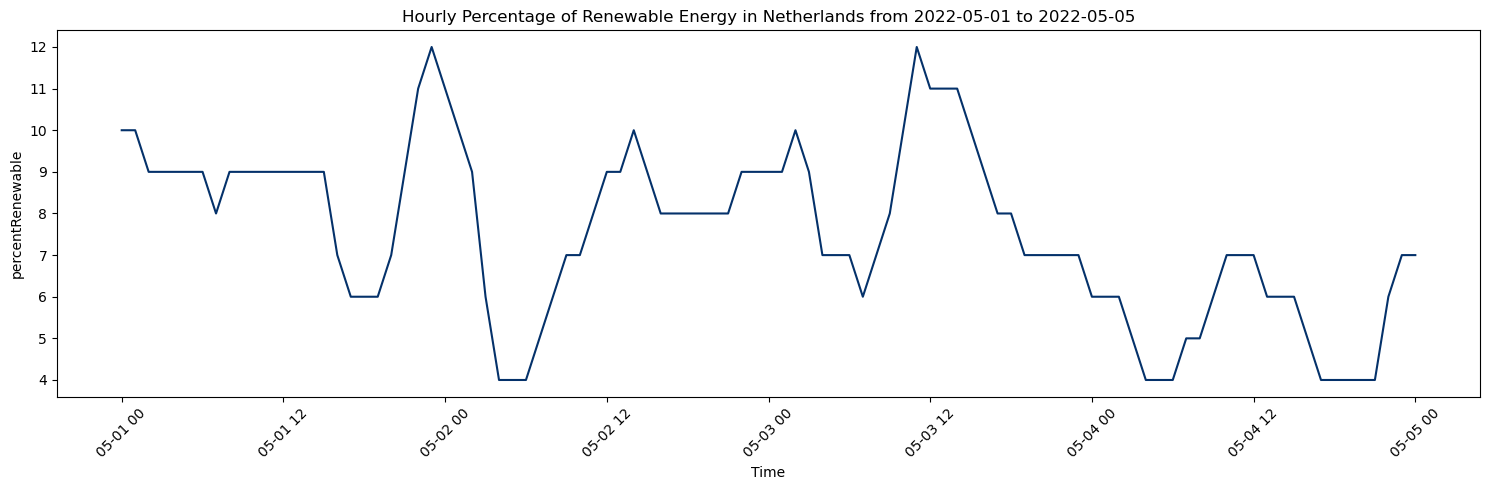

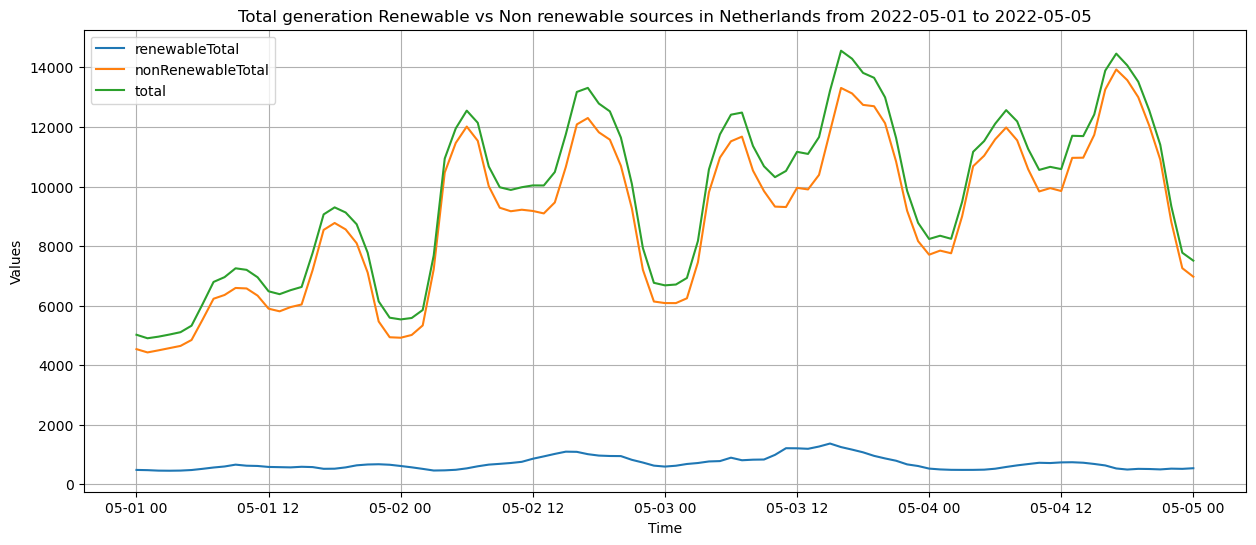

Poland


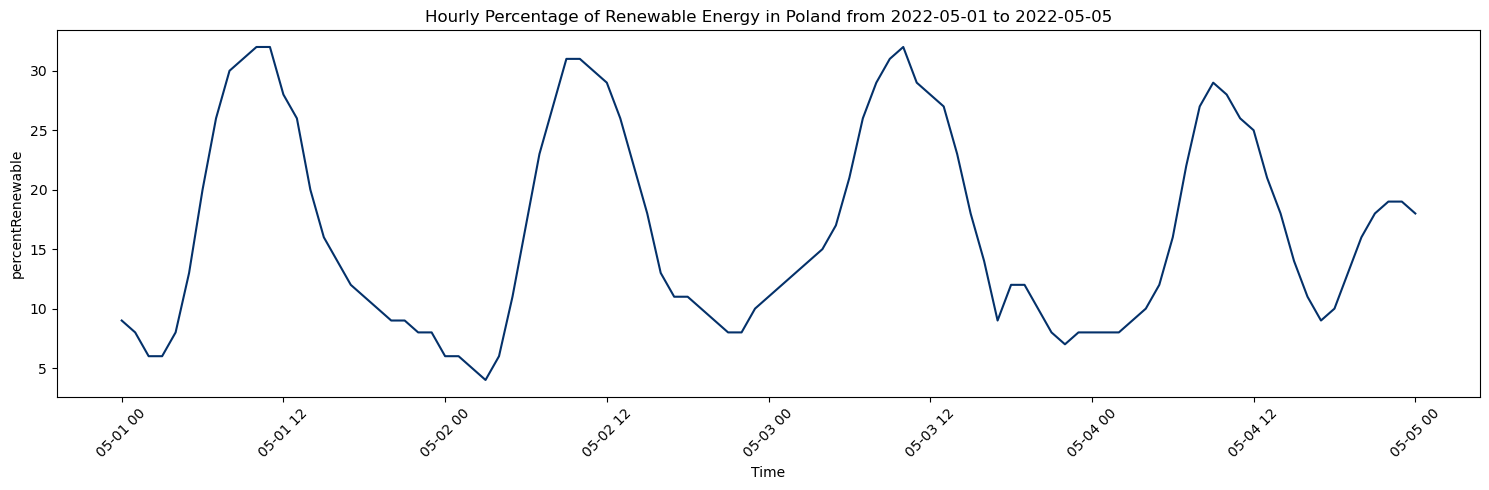

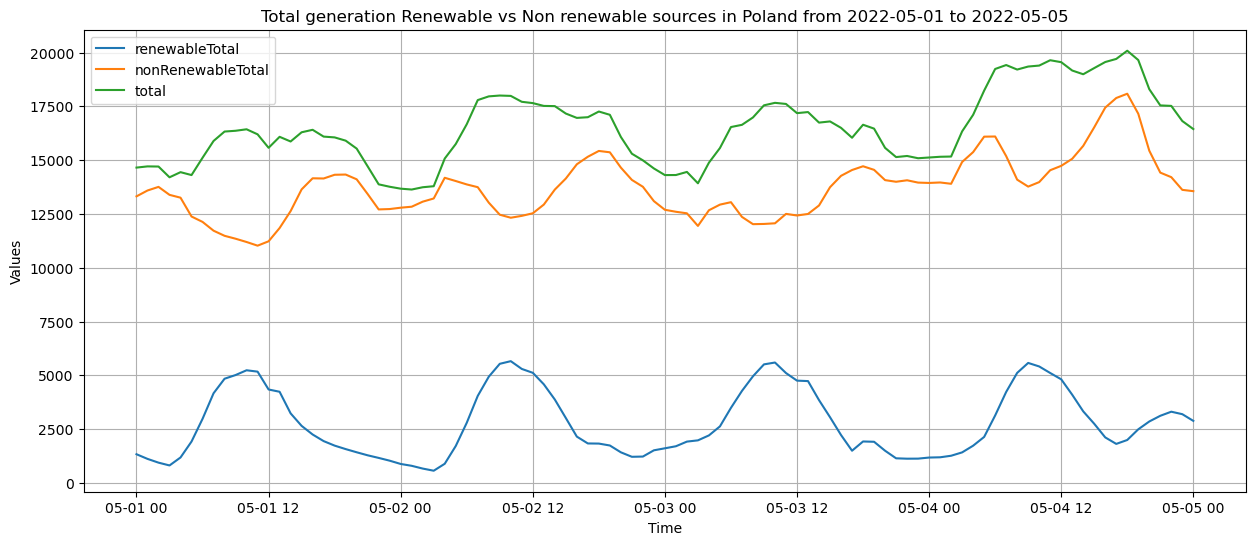

In [143]:
showHourlyPlotsforAllCountries(hourly_start_date,hourly_end_date)

## Major energy production types  
---

Finding the top 5 energy production types for a country


In [190]:
def findEnergyProductionType(data):
    renewableSources = ["Geothermal","Hydro Pumped Storage","Hydro Run-of-river and poundage","Hydro Water Reservoir","Marine","Other renewable","Solar","Waste","Wind Offshore","Wind Onshore"]
    nonRenewableSources = ["Biomass","Fossil Brown coal/Lignite","Fossil Coal-derived gas","Fossil Gas","Fossil Hard coal","Fossil Oil","Fossil Oil shale","Fossil Peal","Nuclear","Other"]
    allCols = data.columns.tolist()
    renPresent  = list(set(allCols).intersection(renewableSources))
    nonRenPresent = list(set(allCols).intersection(nonRenewableSources))
    allPresent = list(set(renPresent).union(set(nonRenPresent)))
    column_sums = data[allPresent].sum()
    d1 = column_sums.to_dict()
    st = pd.DataFrame({"type":list(d1.keys()) , "total":list(d1.values()) })
    st = st.sort_values(by='total',ascending=False)
    total = st['total'].sum()
    st['percentage'] = round((st['total'] / total) * 100)
    print(st)    
    # Generate a pie chart
    plt.figure(figsize=(7,7))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()

def showPieChartsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        print(countryName(c))
        data = getCountryData(c,"actual",start,end)
        findEnergyProductionType(data)
           

Belgium
                               type       total  percentage
2                           Nuclear  32559400.0        40.0
10                       Fossil Gas  23661077.0        29.0
8                     Wind Offshore   6851073.0         8.0
7                             Other   5364648.0         7.0
3                             Solar   4254550.0         5.0
4                      Wind Onshore   4081453.0         5.0
5                           Biomass   2356522.0         3.0
1                             Waste   2039826.0         2.0
0              Hydro Pumped Storage   1026556.0         1.0
6   Hydro Run-of-river and poundage    148099.0         0.0
9                        Fossil Oil      1337.0         0.0


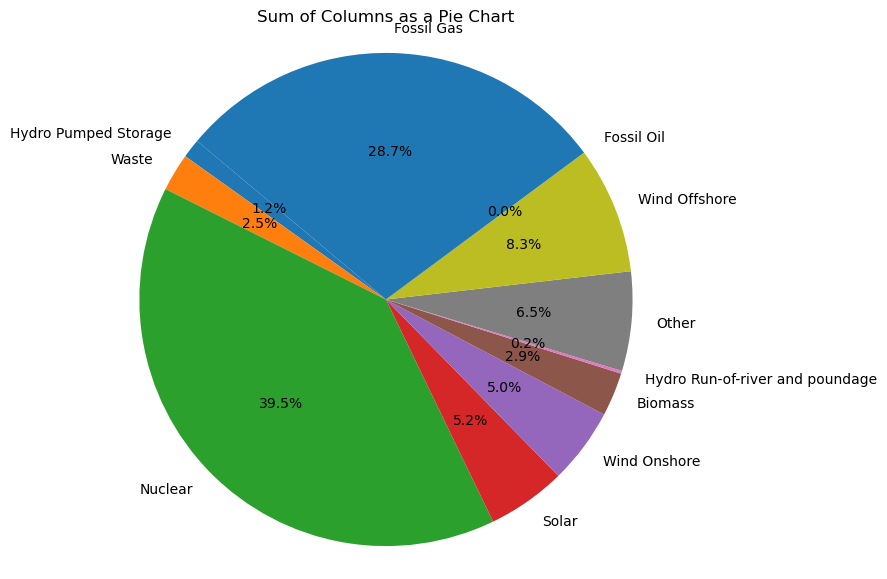

Switzerland
                              type       total  percentage
4                          Nuclear  23270855.0        50.0
0            Hydro Water Reservoir  11836333.0        25.0
1             Hydro Pumped Storage   6870656.0        15.0
5                            Solar   2371989.0         5.0
2  Hydro Run-of-river and poundage   2057661.0         4.0
3                     Wind Onshore    142154.0         0.0


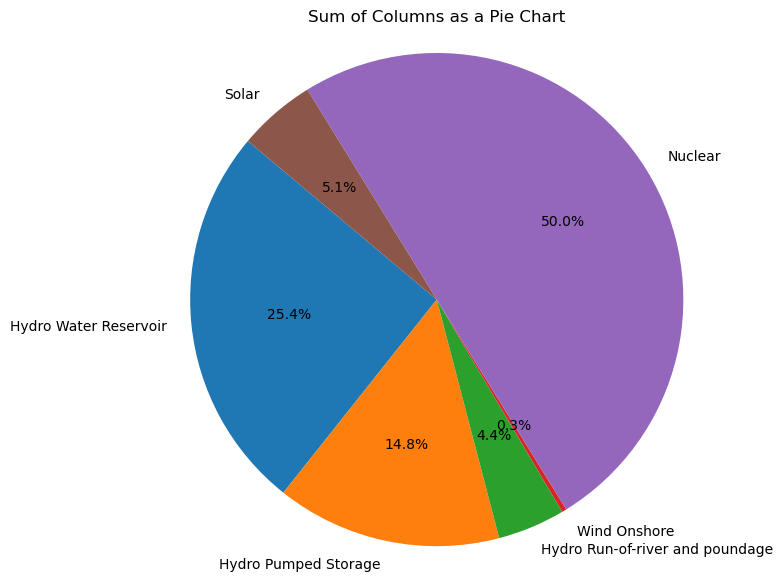

Czech Republic
                               type       total  percentage
6                           Nuclear  28189014.0        37.0
14        Fossil Brown coal/Lignite  26234866.0        35.0
9                        Fossil Gas   5388918.0         7.0
4                   Other renewable   2374310.0         3.0
8                           Biomass   2315737.0         3.0
7                             Solar   2155327.0         3.0
5           Fossil Coal-derived gas   2135103.0         3.0
2                  Fossil Hard coal   1685621.0         2.0
1              Hydro Pumped Storage   1289472.0         2.0
10  Hydro Run-of-river and poundage   1051137.0         1.0
0             Hydro Water Reservoir   1029010.0         1.0
11                            Other    886538.0         1.0
12                     Wind Onshore    683473.0         1.0
3                             Waste    188504.0         0.0
13                       Fossil Oil    104724.0         0.0


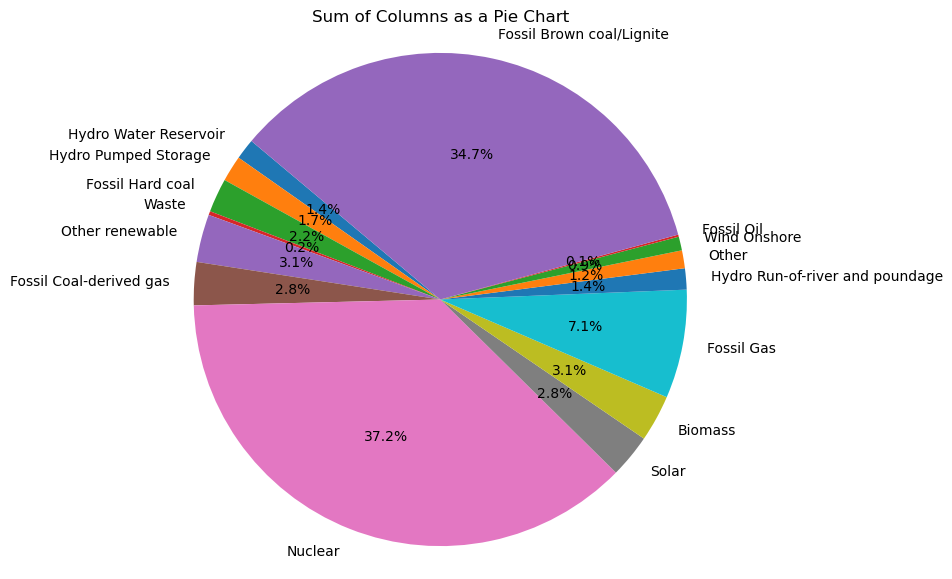

Germany
                               type         total  percentage
13                     Wind Onshore  1.025023e+08        21.0
15        Fossil Brown coal/Lignite  8.293907e+07        17.0
6                           Nuclear  6.055161e+07        12.0
10                       Fossil Gas  5.882418e+07        12.0
7                             Solar  4.574807e+07         9.0
9                           Biomass  4.059986e+07         8.0
2                  Fossil Hard coal  3.468463e+07         7.0
8                     Wind Offshore  2.673767e+07         5.0
11  Hydro Run-of-river and poundage  1.431430e+07         3.0
1              Hydro Pumped Storage  1.146742e+07         2.0
3                             Waste  5.905617e+06         1.0
14                       Fossil Oil  3.694344e+06         1.0
12                            Other  3.077688e+06         1.0
5                   Other renewable  1.400728e+06         0.0
0             Hydro Water Reservoir  1.209231e+06         0.0


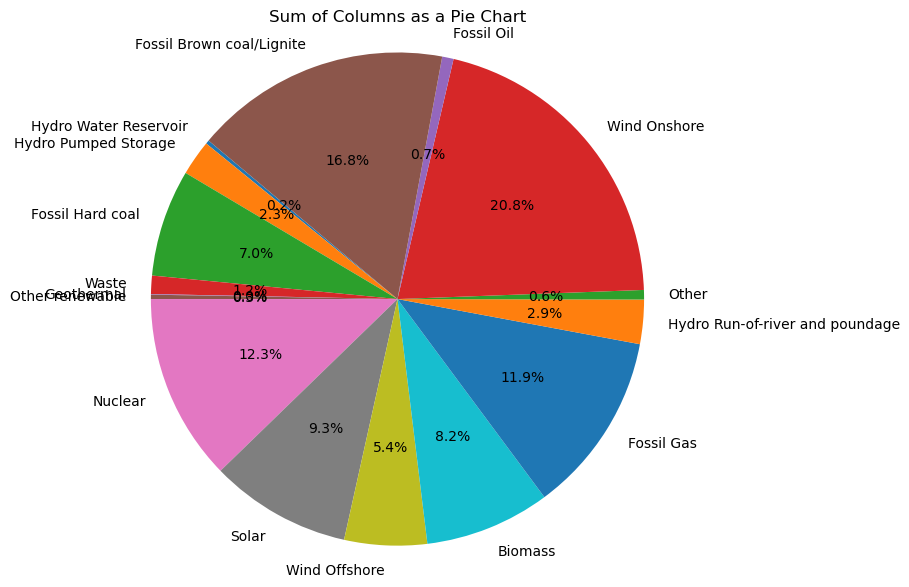

Finland
                               type       total  percentage
3                           Nuclear  22189971.0        38.0
6   Hydro Run-of-river and poundage  14328014.0        25.0
8                      Wind Onshore   7177366.0        12.0
5                           Biomass   5938196.0        10.0
10                       Fossil Gas   4117962.0         7.0
0                  Fossil Hard coal   3000518.0         5.0
7                             Other    638261.0         1.0
2                   Other renewable    202358.0         0.0
1                             Waste    141410.0         0.0
9                        Fossil Oil     17135.0         0.0
4                             Solar         0.0         0.0


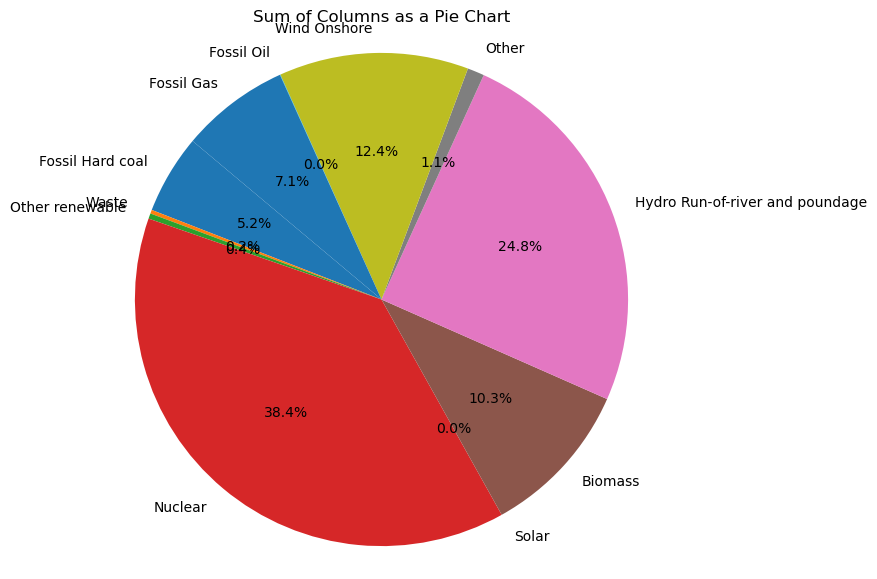

Hungary
                               type         total  percentage
5                           Nuclear  1.504354e+07        49.0
8                        Fossil Gas  7.987792e+06        26.0
13        Fossil Brown coal/Lignite  3.679109e+06        12.0
6                             Solar  1.592697e+06         5.0
7                           Biomass  1.000818e+06         3.0
11                     Wind Onshore  6.344930e+05         2.0
10                            Other  5.210111e+05         2.0
2                             Waste  1.325643e+05         0.0
4                   Other renewable  1.192987e+05         0.0
9   Hydro Run-of-river and poundage  1.134765e+05         0.0
0             Hydro Water Reservoir  1.124508e+05         0.0
1                  Fossil Hard coal  6.098450e+04         0.0
12                       Fossil Oil  4.206000e+03         0.0
3                        Geothermal  2.877500e+02         0.0


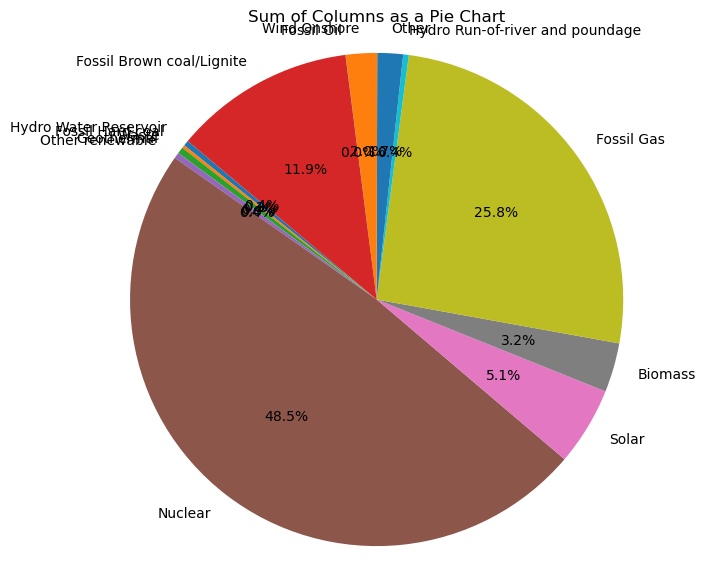

Lithuania
                              type      total  percentage
5                       Fossil Gas  1526315.0        32.0
7                     Wind Onshore  1499533.0        31.0
1             Hydro Pumped Storage   771857.0        16.0
0                          Biomass   401993.0         8.0
2  Hydro Run-of-river and poundage   259062.0         5.0
4                            Waste   147107.0         3.0
3                            Other   140381.0         3.0
6                            Solar    74092.0         2.0


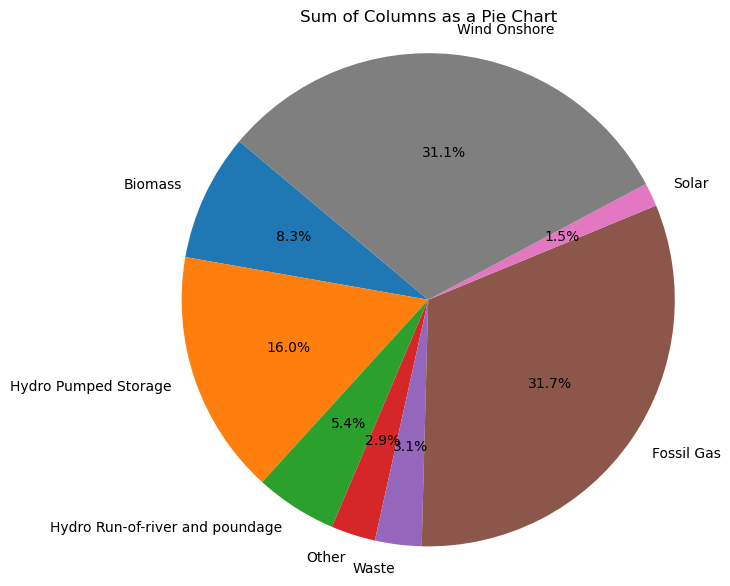

Netherlands
                              type        total  percentage
9                       Fossil Gas  55867603.50        54.0
7                            Other  17840909.75        17.0
0                 Fossil Hard coal  12043385.75        12.0
8                    Wind Offshore   5356946.00         5.0
4                     Wind Onshore   5128733.00         5.0
2                          Nuclear   3842959.25         4.0
1                            Waste   3213307.00         3.0
3                            Solar    210957.50         0.0
5                          Biomass    137355.75         0.0
6  Hydro Run-of-river and poundage         0.00         0.0


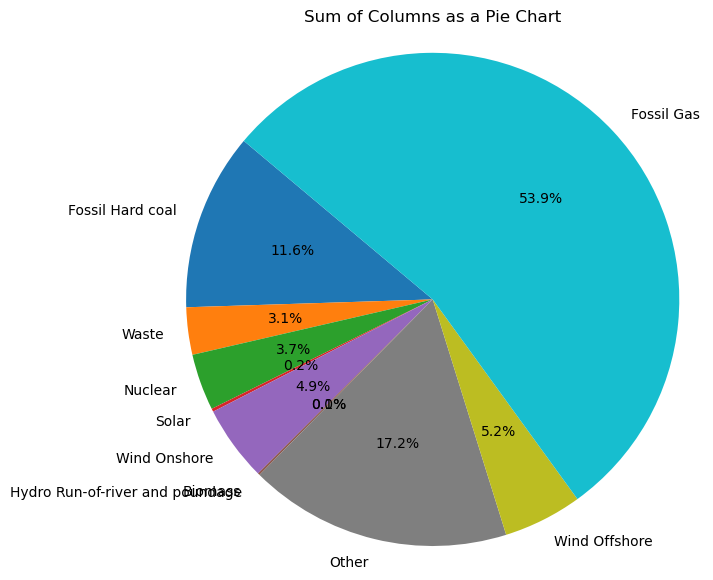

Poland
                               type       total  percentage
2                  Fossil Hard coal  70069503.0        50.0
10        Fossil Brown coal/Lignite  34389262.0        24.0
8                      Wind Onshore  15154885.0        11.0
6                        Fossil Gas  12389021.0         9.0
5                           Biomass   2071195.0         1.0
4                             Solar   1759986.0         1.0
9                        Fossil Oil   1590055.0         1.0
7   Hydro Run-of-river and poundage   1479075.0         1.0
1              Hydro Pumped Storage   1053944.0         1.0
3           Fossil Coal-derived gas    283586.0         0.0
0             Hydro Water Reservoir    136320.0         0.0


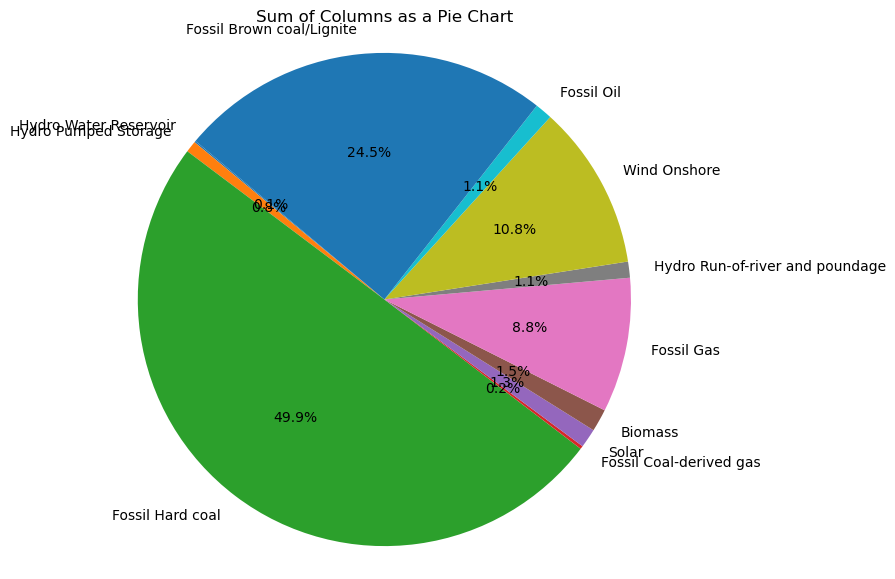

In [192]:
showPieChartsforAllCountries("2020-01-01","2020-12-30")

## Comparing actual energy data with forecast data 
---


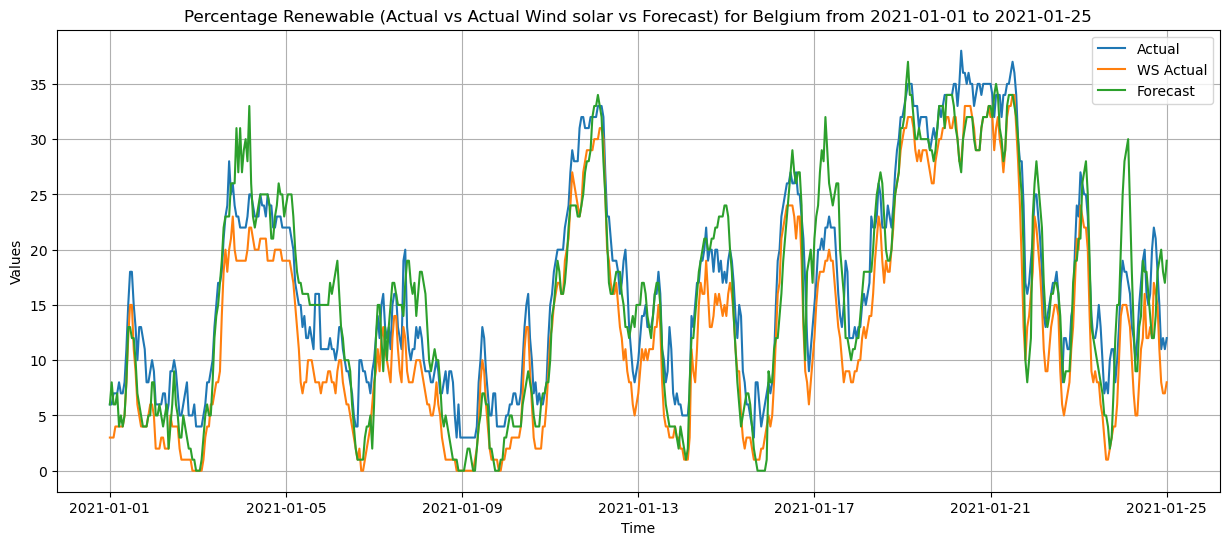

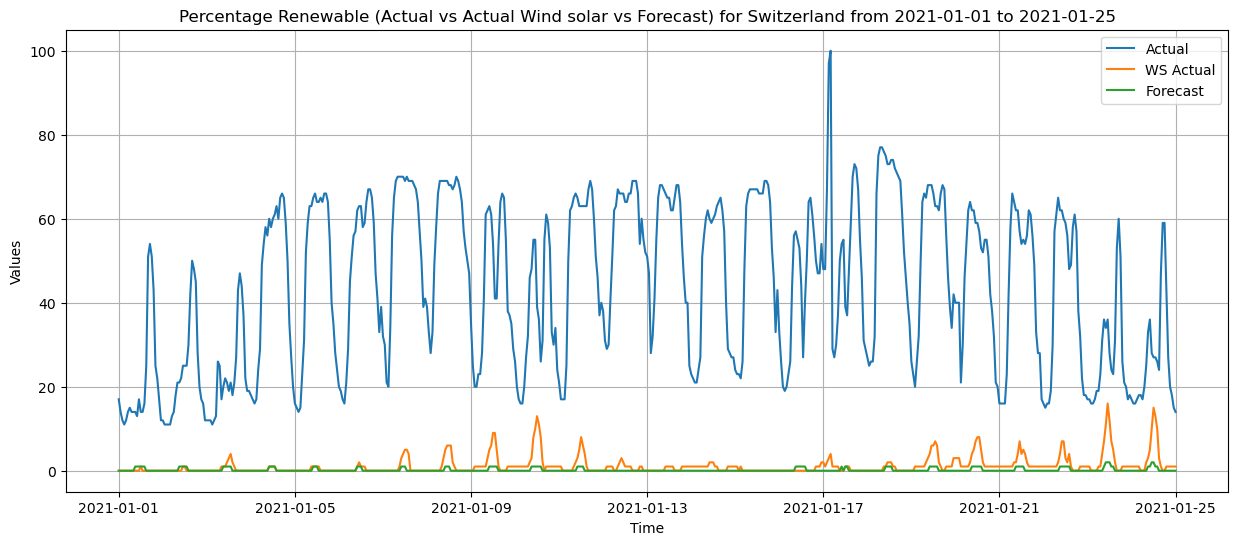

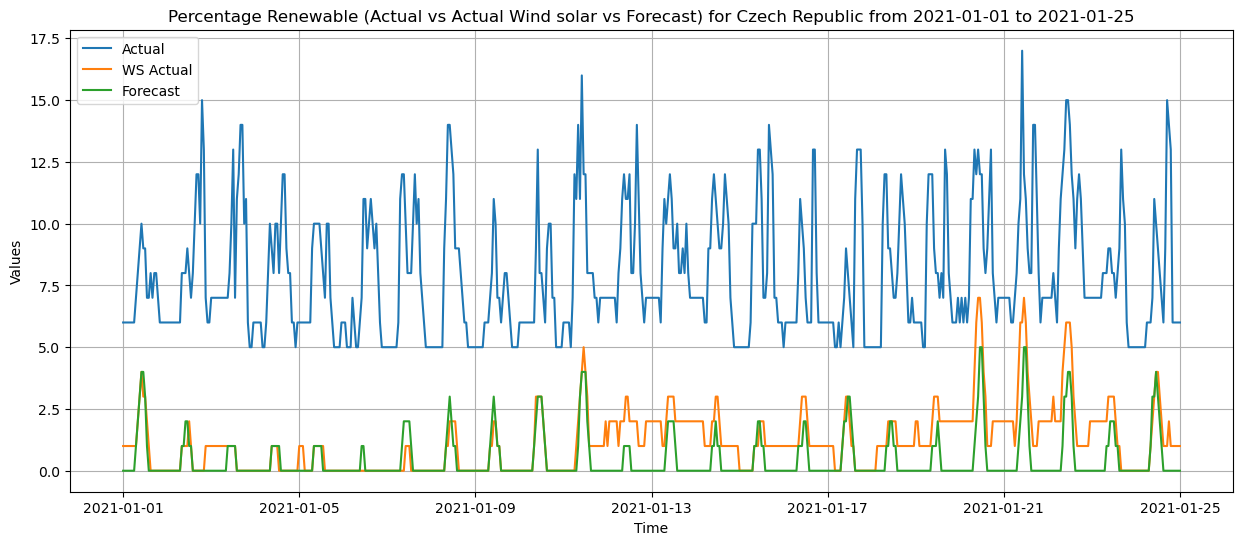

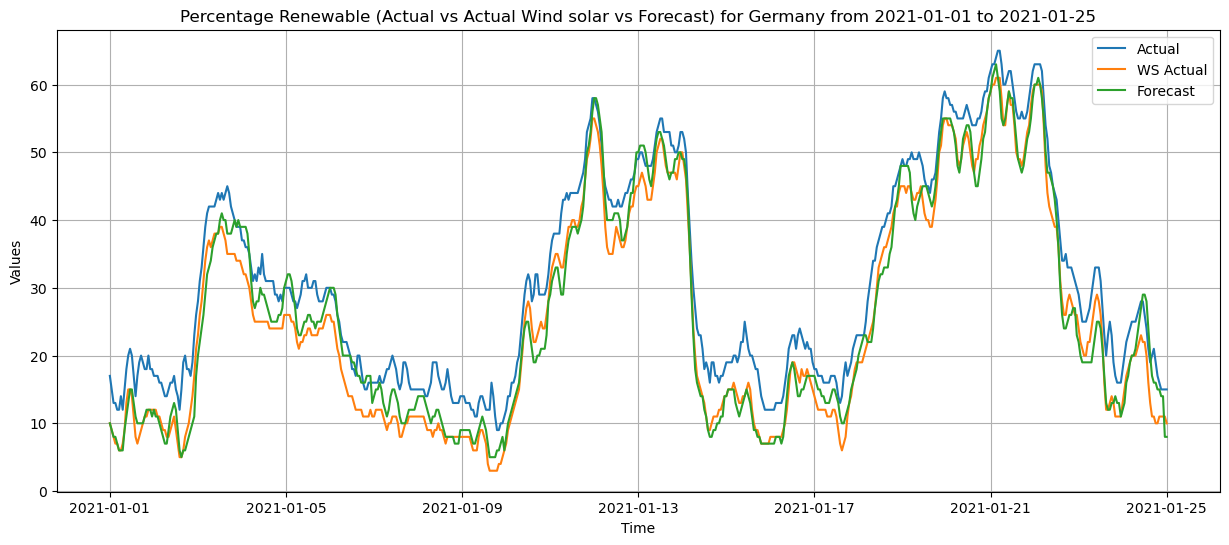

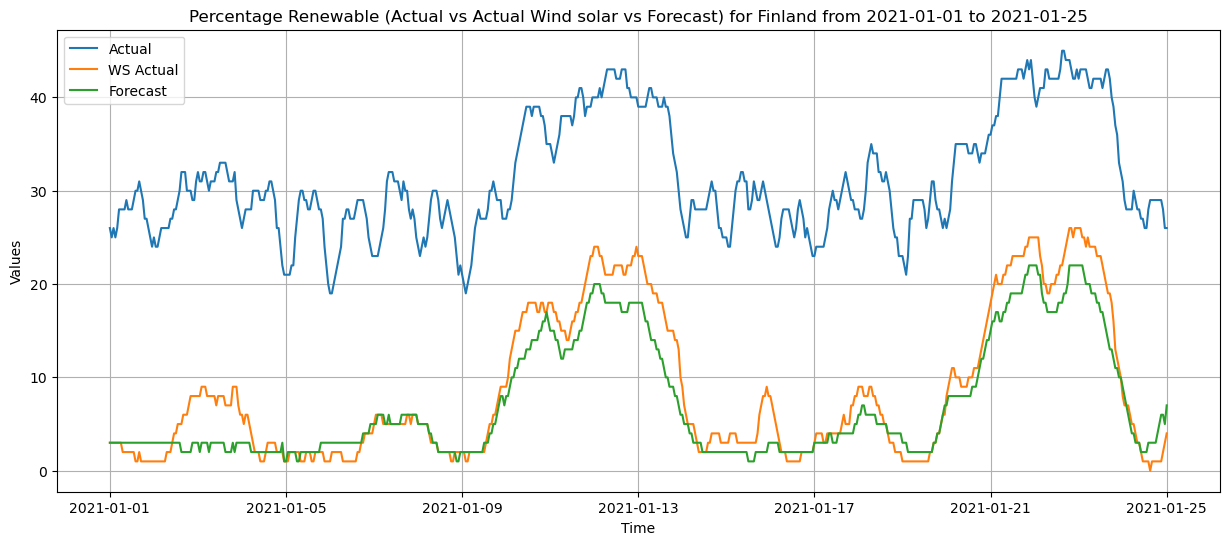

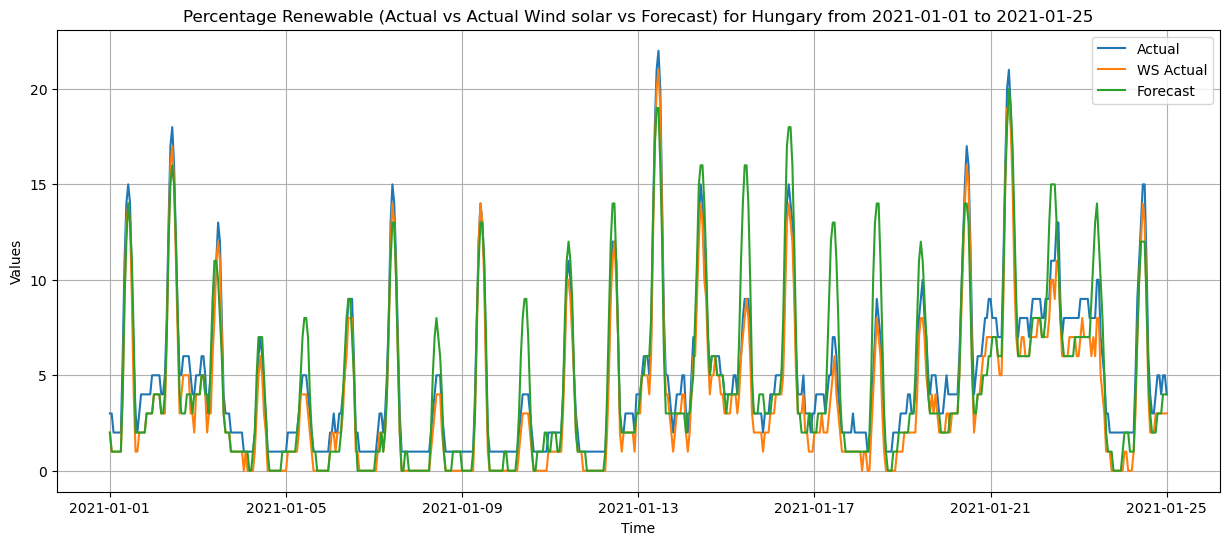

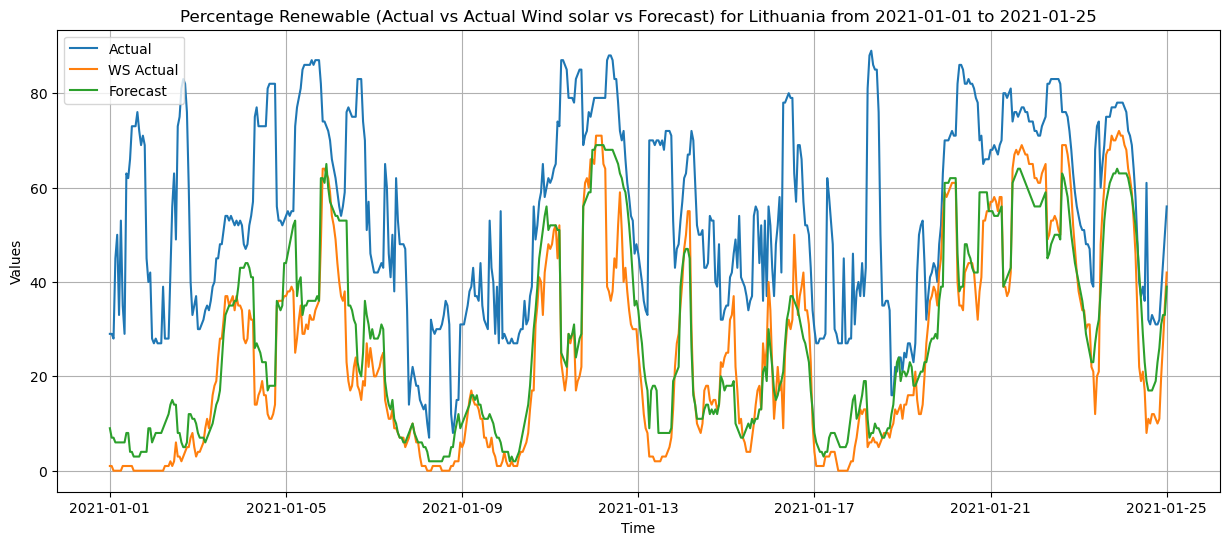

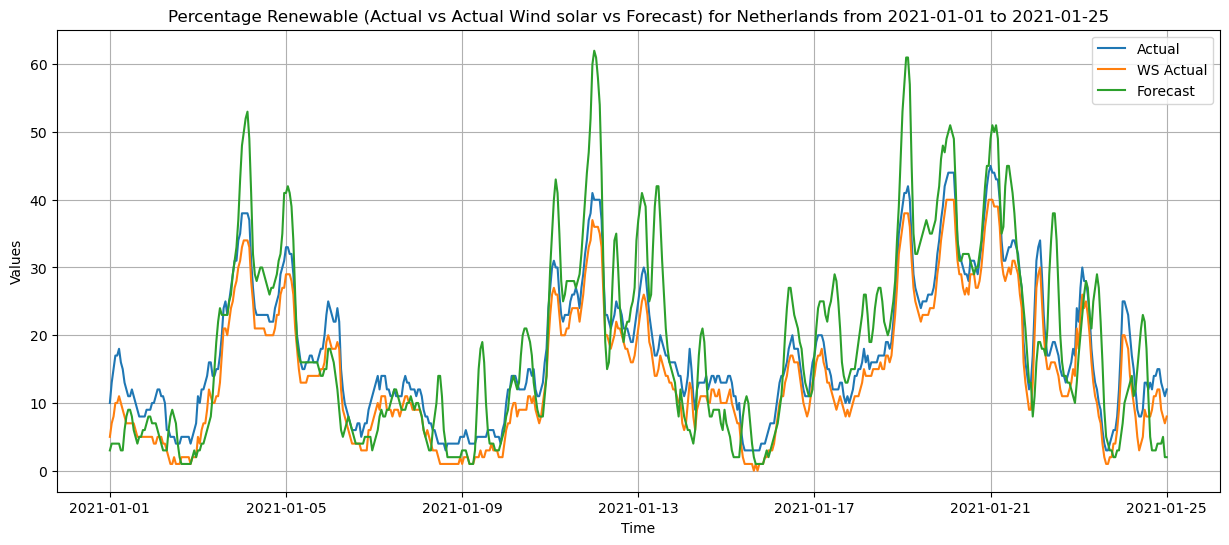

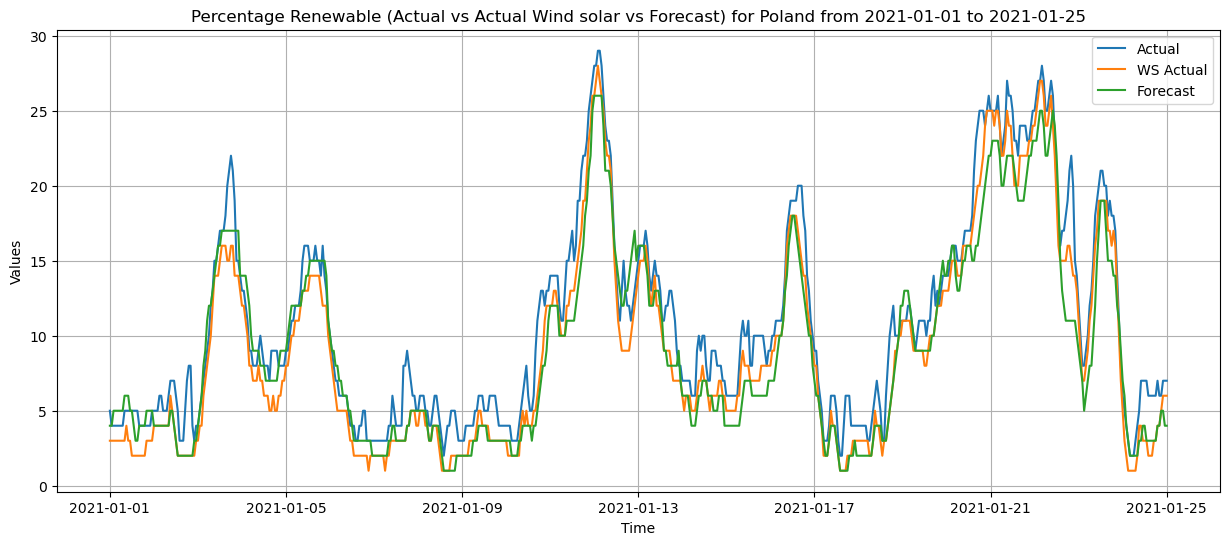

In [135]:
def getActualAndForecastData(code,start,end):
    at = getCountryData(code,"actual",start,end)
    fo = getCountryData(code,"forecast",start,end)
    newData = pd.DataFrame()
    newData["startTime"]=  at["startTime"]
    newData["Actual"] = at["percentRenewable"]
    newData["WS Actual"] = at["percentRenewableWS"]
    newData["Forecast"] = fo["percentRenewable"]
    return newData

def plotActualForecastPercentages(data,code,start,end):
    plot_multiple_line_charts(data, "Percentage Renewable (Actual vs Actual Wind solar vs Forecast) for "+countryName(code)+' from '+start+' to '+end , ["Actual","WS Actual","Forecast"])
    
def showActualForecastPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getActualAndForecastData(c,start,end)
        plotActualForecastPercentages(data,c,start,end)
        
showActualForecastPlotsforAllCountries("2021-01-01","2021-01-25")